# Loan Prediction

# Introduction

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

df = pd.read_csv("train_ctrUa4K.csv") 

print(df.shape)
df.head()

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


There are 614 rows and 13 columns in our dataset.

In [2]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

number of categorical and continuous features

In [3]:
print("Number of categorical features : {}".format(len(df.select_dtypes(include=['object']).columns)))
print("Number of continuous features : {}".format(len(df.select_dtypes(include=['int64', 'float64']).columns)))

Number of categorical features : 8
Number of continuous features : 5


In [4]:
# statistics of numeric data
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


614 rows. We see some missing values in LoanAmount , Loan_Amount_Term and Credit_History as these are less than 614 count.

We see that ApplicationIncome and CoapplicantIncome is right skewed with a mean > median


# Visualize Income by Education

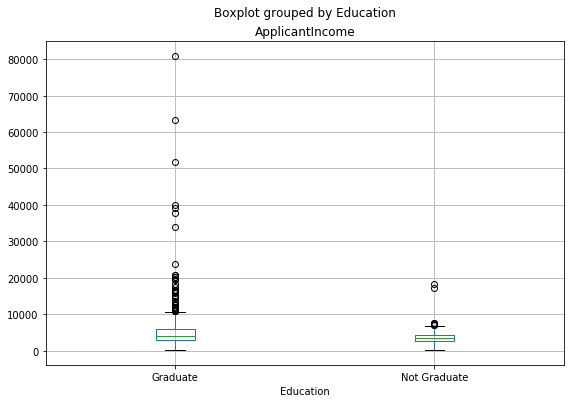

In [5]:
df.boxplot(column='ApplicantIncome', by = 'Education', figsize=(9,6));

There is no substantial difference between the mean income of graduate and non-graduates. But there are a higher number of graduates with very high incomes, which appear as outliers

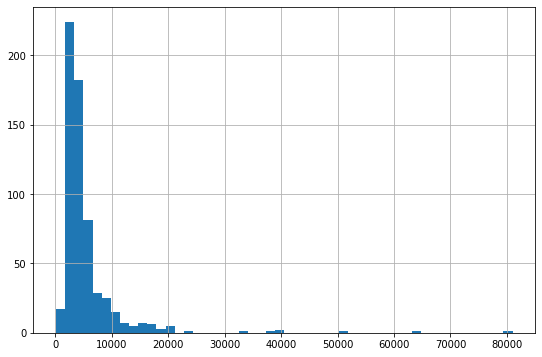

In [6]:
df['ApplicantIncome'].hist(bins=50, figsize=(9,6));

Similar analysis for LoanAmount. As a result we will need to log transform income values to create a more normal distribution.

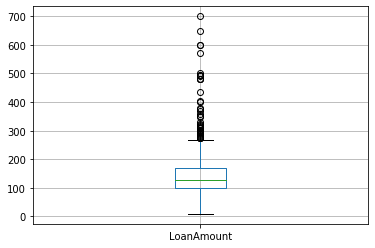

In [7]:
df.boxplot(column='LoanAmount');

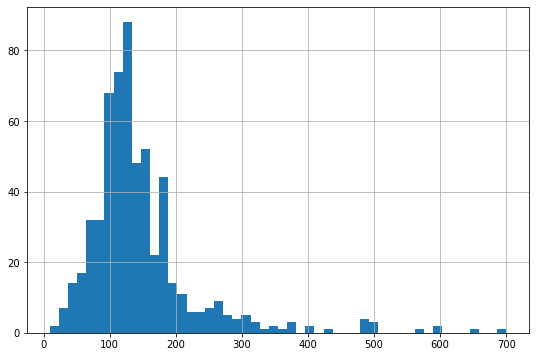

In [8]:
df['LoanAmount'].hist(bins=50, figsize=(9,6));

In [9]:
# delete as it doesn't add value
del df['Loan_ID']
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# look at the value counts for the categorical variables

In [10]:
for c in df.columns:
    if c in['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
        continue
    print(c)
    print(df[c].value_counts(), '\n')

Gender
Male      489
Female    112
Name: Gender, dtype: int64 

Married
Yes    398
No     213
Name: Married, dtype: int64 

Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64 

Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64 

Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64 

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64 

Credit_History
1.0    475
0.0     89
Name: Credit_History, dtype: int64 

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64 

Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64 



More applicates are Male and about half are married. Most are college graduates and not self employed. Over twice as many loans were approved versus not approved.

# Visualize Income and LoanAmount vs Approved

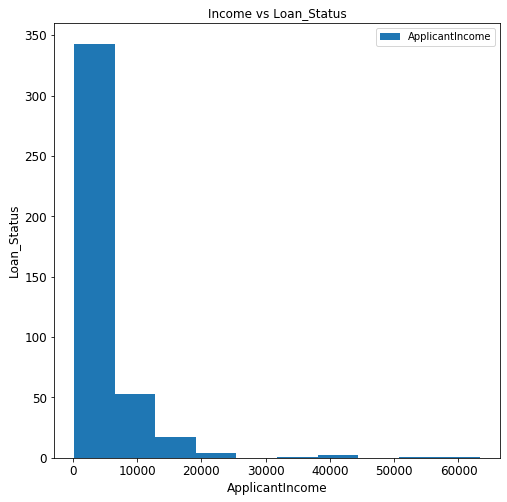

In [11]:
import matplotlib.pyplot as plt

def barPlot(data, aTitle):
    data = data[data['Loan_Status']=='Y']
    ax = data.plot(kind='hist', figsize=(8, 8), title=aTitle, legend=True, fontsize=12)
    ax.set_xlabel(data.columns[0], fontsize=12)
    ax.set_ylabel("Loan_Status", fontsize=12)
    plt.show()
    
barPlot(df[['ApplicantIncome','Loan_Status']], 'Income vs Loan_Status')

Most of the loan approvals were in the lower inome range

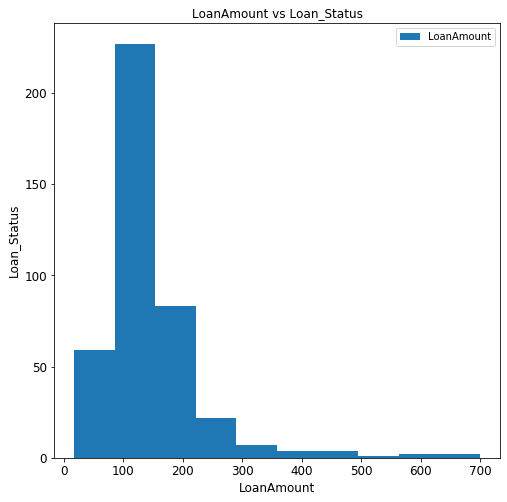

In [12]:
barPlot(df[['LoanAmount','Loan_Status']], 'LoanAmount vs Loan_Status')

Most of the loan approvals were for Loan Amounts between 100-150

# look for and fill missing values

In [13]:
# missing value counts

df.apply(lambda x: sum(x.isnull()), axis=0) 

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

most people are not self employed so for missing values assume No

In [14]:
df['Self_Employed'].fillna('No', inplace=True)

add a new total income column which combines two incomes and log transform

In [15]:
## add a new total income column which combines incomes and log transform
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])

#replacing remaining missing values

df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

pivot table shows median Loan amount by employment and education. Populate missing LoanAmount values given this pivot table data

In [16]:
table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
table

Education,Graduate,Not Graduate
Self_Employed,,
No,130.0,113.0
Yes,157.5,130.0


In [17]:
def fage(x):
    return table.loc[x['Self_Employed'], x['Education']]

df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

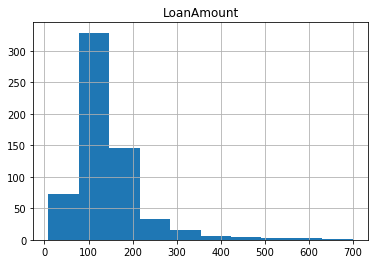

In [18]:
df[['LoanAmount']].hist();

Histogram is skewed. Log transform monetary values due to outliers (Eg: some individuals making much more than the average and others making much less

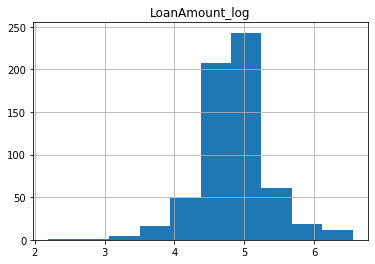

In [19]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])

df[['LoanAmount_log']].hist();

The log transformed LoanAmount has a more normal distribution.

# Model Selection via Cross Validation

Models get better as the amount of training data increases. One solution is cross validation. With cross validation, dataset is divided into n splits. N-1 split is used for training and the remaining split is used for testing. The model runs through the entire dataset n times and at each time, a different split is used for testing. Thus, we use all of data points for both training and testing. Cross validation is also useful to measure the performance of a model more accurately, especially on new, previously unseen data points.

There are different methods to split data in cross validation. KFold and StratifiedKFold are commonly used.

KFold: divides the dataset into k folds. If shuffle is set to False, consecutive folds will be the shifted version of previous fold.If shuffle is set to True, then the splitting will be random. StratifiedKFold: in classifications tasks with imbalanced class distributions, we should prefer StratifiedKFold over KFold Cross_val_score takes the dataset and applies cross validation to split the data. Then, train a model using the specified estimator (e.g. logistic regression, decision tree, …) and measure the performance of the model (scoring parameter).

# encode categorical

Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status, Credit_History, Loan_Amount_Term

In [20]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status',
          'Credit_History', 'Loan_Amount_Term']

le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i].astype(str))

df.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term       int64
Credit_History         int64
Property_Area          int64
Loan_Status            int64
TotalIncome          float64
TotalIncome_log      float64
LoanAmount_log       float64
dtype: object

# Correlation Matrix

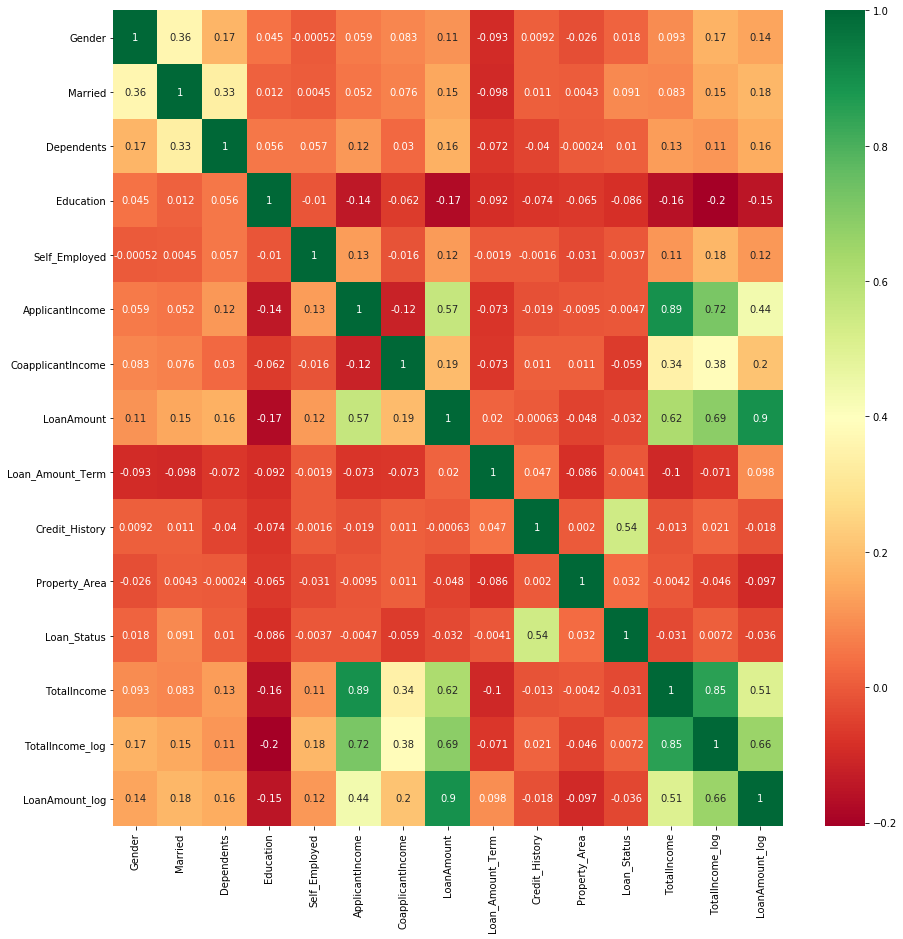

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))

#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

- remove TotalIncome, ApplicantIncome from modeling given derived column TotalIncome_log
- remove LoanAmount given LoanAmount_Log

# categorical features

In [22]:
catFeatures = df[['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status',
                 'Credit_History', 'Loan_Amount_Term']]
catFeatures.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,Credit_History,Loan_Amount_Term
0,1,0,0,0,0,2,1,1,6
1,1,1,1,0,0,0,0,1,6
2,1,1,0,0,1,2,1,1,6
3,1,1,0,1,0,2,1,1,6
4,1,0,0,0,0,2,1,1,6


# What's the relationship between Loan_Status and category variables?

In [23]:
import researchpy as rp

for c in catFeatures.columns:
    if c=='Loan_Status':
        continue
    print(rp.summary_cat(df[[c, "Loan_Status"]]), '\n')
    

      Variable  Outcome  Count  Percent
0       Gender        1    502    81.76
1                     0    112    18.24
2  Loan_Status        1    422    68.73
3                     0    192    31.27 

      Variable  Outcome  Count  Percent
0      Married        1    401    65.31
1                     0    213    34.69
2  Loan_Status        1    422    68.73
3                     0    192    31.27 

      Variable  Outcome  Count  Percent
0   Dependents        0    360    58.63
1                     1    102    16.61
2                     2    101    16.45
3                     3     51     8.31
4  Loan_Status        1    422    68.73
5                     0    192    31.27 

      Variable  Outcome  Count  Percent
0    Education        0    480    78.18
1                     1    134    21.82
2  Loan_Status        1    422    68.73
3                     0    192    31.27 

        Variable  Outcome  Count  Percent
0  Self_Employed        0    532    86.64
1                       1   

From above, more loans are approved than not.

- Of these more applicants are males, married, and the majority 0 dependents.
- 78% are college graduates and are not self employed
- Most loans are for 30 years

# Feature Selection using RandomForest

In [24]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'TotalIncome', 'TotalIncome_log', 'LoanAmount_log'],
      dtype='object')

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

# All columns
predictors = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 
       'LoanAmount_log', 'TotalIncome_log']


# Split the data into 30% test and 70% training
X_train, X_test, y_train, y_test = train_test_split(df[predictors], 
                                                    df['Loan_Status'], 
                                                    test_size=0.3, random_state=0)

# Create a random forest classifier fpr feature importance
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(predictors, clf.feature_importances_):
    print(feature)
    

('Gender', 0.019535676743160545)
('Married', 0.026324693334126046)
('Dependents', 0.05840012812565244)
('Education', 0.025352216708364565)
('Self_Employed', 0.025216445699031916)
('Loan_Amount_Term', 0.029216790124792013)
('Credit_History', 0.26415492518940975)
('Property_Area', 0.053931816731333695)
('LoanAmount_log', 0.22924725453789438)
('TotalIncome_log', 0.26862005280623463)


The scores above are the importance scores for each variable. All the importance scores add up to 100%

# Identify And Select Most Important Features

In [26]:
# Create a selector object that uses the random forest classifier to identify
# features that have an importance of more than 0.10
sfm = SelectFromModel(clf, threshold=0.10)

# Train the selector
sfm.fit(X_train, y_train)

# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(predictors[feature_list_index])

Credit_History
LoanAmount_log
TotalIncome_log


# Create A Data Subset With Only the most important Features and compare the accuracy Of the Full Feature Classifier to the Limited Feature Classifier

In [27]:
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

#Train A New Random Forest Classifier Using Only Most Important Features
clf_important = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

clf_important.fit(X_important_train, y_train)

# Apply The Full Featured Classifier To The Test Data
y_pred = clf.predict(X_test)
print('full model:', accuracy_score(y_test, y_pred))


# Apply The limited Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

print('limited model:', accuracy_score(y_test, y_important_pred))

full model: 0.7945945945945946
limited model: 0.7621621621621621


The original model which contained all features is only slightly more accurate than the ‘limited’ model with only the following features:

- Credit_History, LoanAmount_log, TotalIncome_log

# Chi-Square Feature Selection for categorical

A chi-square test is used to test the independence of two events. More specifically in feature selection we use it to test whether the occurrence of a specific term and the occurrence of a specific class are independent.

In [28]:
from sklearn.feature_selection import chi2

y = catFeatures ['Loan_Status'].values

catFeatures = catFeatures.drop(['Loan_Status'], axis=1)
x = catFeatures.values

chi_scores = chi2(x, y)
chi_scores

(array([3.62343084e-02, 1.78242499e+00, 8.59527587e-02, 3.54050246e+00,
        7.28480330e-03, 3.77837464e-01, 2.60058772e+01, 2.68593345e-03]),
 array([8.49032435e-01, 1.81851834e-01, 7.69386856e-01, 5.98873168e-02,
        9.31982300e-01, 5.38762867e-01, 3.40379591e-07, 9.58667345e-01]))

The first array represents chi square values and second array represnts p-values. Plotting the p-values

In [29]:
# supporess scientific notation
pd.set_option('display.float_format', lambda x: '%.10f' % x)

p_values = pd.Series(chi_scores[1], index = catFeatures.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values

Loan_Amount_Term   0.9586673447
Self_Employed      0.9319823003
Gender             0.8490324346
Dependents         0.7693868564
Property_Area      0.5387628674
Married            0.1818518340
Education          0.0598873168
Credit_History     0.0000003404
dtype: float64

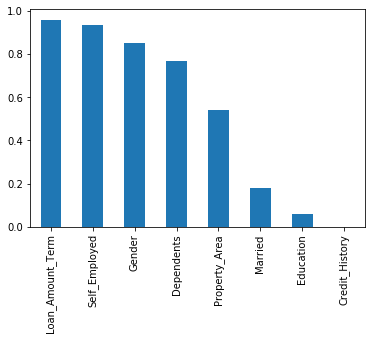

In [30]:
p_values.plot.bar();

- Credit_History, Education

are the only features with p-values near (p < 0.05 which is the usual test for dependence). All other features have a pvalue well above 0.05, indicating they are independent of the response variable and hence aren't considered for model training.


# SelectKBest for Feature Selection

In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2

selector = SelectKBest(score_func=chi2, # Chi-squared stats of non-negative features for classification tasks
                       k='all')  

#y = catFeatures ['Loan_Status'].values
#catFeatures = catFeatures.drop(['Loan_Status'], axis=1)
#x = catFeatures.values
    
# apply feature selection
x_selected = selector.fit_transform(x, y)

print(x_selected.shape)
print('feature scores: ', selector.scores_,)
print('feature p-values scores:',  selector.pvalues_)

(614, 8)
feature scores:  [3.62343084e-02 1.78242499e+00 8.59527587e-02 3.54050246e+00
 7.28480330e-03 3.77837464e-01 2.60058772e+01 2.68593345e-03]
feature p-values scores: [8.49032435e-01 1.81851834e-01 7.69386856e-01 5.98873168e-02
 9.31982300e-01 5.38762867e-01 3.40379591e-07 9.58667345e-01]


In [32]:
# Get F-scores
cols = selector.get_support(indices=True)

fscores = selector.scores_[cols]

names = catFeatures.iloc[:, cols]
names_scores = list(zip(names, fscores))

ns_df = pd.DataFrame(data = names_scores, columns=['Feature', 'F_Scores'])

#sort
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feature'], ascending = [False, True])
print(ns_df_sorted)

            Feature      F_Scores
6    Credit_History 26.0058771534
3         Education  3.5405024640
1           Married  1.7824249851
5     Property_Area  0.3778374638
2        Dependents  0.0859527587
0            Gender  0.0362343084
4     Self_Employed  0.0072848033
7  Loan_Amount_Term  0.0026859335


Top selected categorical features given higher F scores:

- Credit_History, Education is aligned with the chi2 test.

# Numeric Features

In [33]:
numFeatures = df.drop(['Gender','Married','Dependents','Education','Self_Employed','Property_Area',
                      'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'TotalIncome',
                      'Credit_History', 'Loan_Amount_Term'], axis=1)
numFeatures.head()

,Loan_Status,TotalIncome_log,LoanAmount_log
0,1,8.6740259854,4.8675344505
1,0,8.7145675508,4.8520302639
2,1,8.0063675677,4.1896547420
3,1,8.5053230188,4.7874917428
4,1,8.6995147482,4.9487598904


In [34]:
selector = SelectKBest(score_func=f_classif, #ANOVA F-value between label/feature for classification tasks.
                       k='all')

y = numFeatures ['Loan_Status'].values

numFeatures = numFeatures.drop(['Loan_Status'], axis=1)
x = numFeatures.values
    
x_selected = selector.fit_transform(x, y)

print(x_selected.shape)
print('feature scores: ', selector.scores_,)
print('feature p-values scores:',  selector.pvalues_)
print()

# print F scores
cols = selector.get_support(indices=True)
fscores = selector.scores_[cols]

names = numFeatures.iloc[:, cols]
names_scores = list(zip(names, fscores))

ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])

#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

(614, 2)
feature scores:  [0.03208211 0.78153755]
feature p-values scores: [0.85790684 0.37701847]

        Feat_names     F_Scores
1   LoanAmount_log 0.7815375450
0  TotalIncome_log 0.0320821131


Top numeric features given high F score: LoanAmount_log

TotalIncome_log   0.8579068390
LoanAmount_log    0.3770184746
dtype: float64


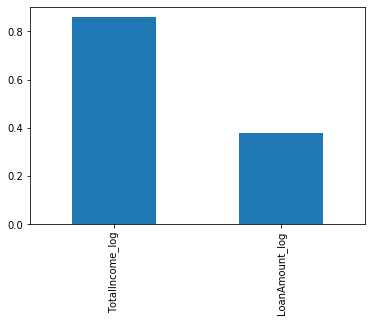

In [35]:
p_values = pd.Series(selector.pvalues_, index = numFeatures.columns)
p_values.sort_values(ascending = False , inplace = True)

p_values.plot.bar();

print(p_values)

Combining most important categorical and numeric features:

- Credit_History, Education, LoanAmount_log
This as compared to RandomForest
- Credit_History, LoanAmount_log, TotalIncome_log


# Assess different models via cross validation

In [36]:
# cross validation modeling helper
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

def classification_model(model, data, predictors, outcome, splits=10):
    
  kfold = KFold(n_splits=splits, random_state=7, shuffle=True) 
  x = data[predictors]
  y = data[outcome]
  
  scores = cross_val_score(model, x, y, cv=kfold, scoring='accuracy')
  print("  Accuracy: %f (%f)" % (scores.mean(), scores.std()))
  return scores

In [37]:
def test_models(predictors, n_splits):
    outcome_var = 'Loan_Status'
    
    models = [RandomForestClassifier(n_estimators=100), 
              MultinomialNB(),
              LogisticRegression(max_iter=500),
    ]

    entries = []

    for model in models:
        model_name = type(model).__name__
        print (model_name)

        scores = classification_model(model, df, predictors, outcome_var,  n_splits)

        for fold_idx, accuracy in enumerate(scores):
            entries.append((model_name, fold_idx, accuracy))


    # plot
    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
    cv_df.groupby('model_name').accuracy.mean().sort_values()

    import seaborn as sns

    sns.boxplot(x='model_name', y='accuracy', data=cv_df)
    sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
                  size=8, jitter=True, edgecolor="gray", linewidth=2)
    plt.show()

# model using features selected from above

RandomForestClassifier
  Accuracy: 0.767067 (0.011766)
MultinomialNB
  Accuracy: 0.687378 (0.040143)
LogisticRegression
  Accuracy: 0.809543 (0.035489)


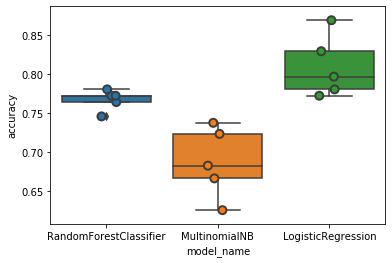

In [38]:
predictors = ['Education', 'Credit_History', 'TotalIncome_log',
              'LoanAmount_log', 
             ]
test_models(predictors, 5)

LogisticRegression has the highest mean accuracy, followed by RandomForest, then NB

# Model using features selected from Random Forest

RandomForestClassifier
  Accuracy: 0.758936 (0.015410)
MultinomialNB
  Accuracy: 0.687378 (0.040143)
LogisticRegression
  Accuracy: 0.809543 (0.035489)


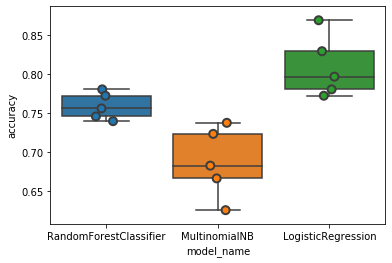

In [39]:
predictors = ['Credit_History', 'LoanAmount_log', 'TotalIncome_log']

test_models(predictors, 5)

results comparable though RadomForest is slightly worse with this model


# Model using all features

RandomForestClassifier
  Accuracy: 0.781834 (0.024880)
MultinomialNB
  Accuracy: 0.689004 (0.039429)
LogisticRegression
  Accuracy: 0.809543 (0.035489)


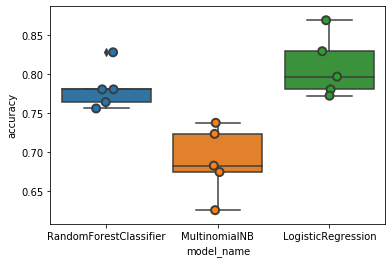

In [40]:
predictors = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'TotalIncome_log', 'LoanAmount_log']

test_models(predictors, 5)

results comparable but RadomForest performance is alittle better

# Create a final model and make predictions

From the above, LogisticRegression performs the best

In [41]:
import sklearn.metrics as metrics

predictors = ['Education', 'Credit_History', 
              'LoanAmount_log', 'TotalIncome_log'
             ]

# Split the data into 30% test and 70% training
X_train, X_test, y_train, y_test = train_test_split(df[predictors], 
                                                    df['Loan_Status'], 
                                                    test_size=0.3, random_state=0)

lr =  LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)

#Make predictions on training set:
predictions = lr.predict(X_test)
  
#Print accuracy
accuracy = metrics.accuracy_score(predictions, y_test)
print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

Accuracy : 82.703%


In [42]:
test = X_test
test['Loan_Status'] = y_test
test

,Education,Credit_History,LoanAmount_log,TotalIncome_log,Loan_Status
454,0,1,4.4308167988,8.8657351521,1
52,0,1,4.7184988713,8.3499572720,0
536,0,1,5.7807435158,9.2142327867,1
469,0,1,4.7004803658,8.8223221775,0
55,0,1,4.5747109785,8.2623009418,1
...,...,...,...,...,...
242,0,1,5.0434251169,9.0671626023,1
515,0,1,5.0106352941,8.8384067471,1
582,0,1,3.5835189385,8.0602242404,1
225,0,1,5.1357984371,8.0864102753,0


# Predict custom value

with selected features: 'Education', 'Credit_History', 'LoanAmount_log', 'TotalIncome_log

First view approved and not approved records

In [43]:
columns = ['Education', 'TotalIncome','LoanAmount', 'Loan_Amount_Term', 
          'Credit_History', 'Loan_Status']
notapproved = df[df['Loan_Status']==0]
notapproved = notapproved[columns]
notapproved

,Education,TotalIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
1,0,6091.0000000000,128.0000000000,6,1,0
7,0,5540.0000000000,158.0000000000,6,0,0
9,0,23809.0000000000,349.0000000000,6,1,0
13,0,4693.0000000000,114.0000000000,6,1,0
17,0,3510.0000000000,76.0000000000,6,0,0
...,...,...,...,...,...,...
596,1,7383.0000000000,187.0000000000,6,1,0
597,0,2987.0000000000,88.0000000000,6,0,0
600,0,42083.0000000000,350.0000000000,2,1,0
605,1,6200.0000000000,113.0000000000,2,1,0


In [44]:
approved = df[df['Loan_Status']==1]
approved = approved[columns]
approved

,Education,TotalIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0,5849.0000000000,130.0000000000,6,1,1
2,0,3000.0000000000,66.0000000000,6,1,1
3,1,4941.0000000000,120.0000000000,6,1,1
4,0,6000.0000000000,141.0000000000,6,1,1
5,0,9613.0000000000,267.0000000000,6,1,1
...,...,...,...,...,...,...
608,0,5182.0000000000,108.0000000000,6,1,1
609,0,2900.0000000000,71.0000000000,6,1,1
610,0,4106.0000000000,40.0000000000,2,1,1
611,0,8312.0000000000,253.0000000000,6,1,1


# LoanAmount 350, TotalIncome 100

In [45]:
Xnew = [[0, 1, 5.8579, 4.60517]]

pred = lr.predict(Xnew)
print (pred)

[1]


Prediction is approved: (Graduate and with Credit History)

In [46]:
Xnew = [[0, 0, 5.8579, 4.60517]]

pred = lr.predict(Xnew)
print (pred)

[0]


Prediction is not approved (All same except Credit History is No)